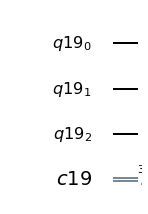

In [74]:
from qiskit import *
from math import acos, sqrt

#creating registers, q=quantum, c=classical
qreg = QuantumRegister(3)
creg = ClassicalRegister(3)

circuit = QuantumCircuit(qreg,creg)
circuit.draw(output='mpl')

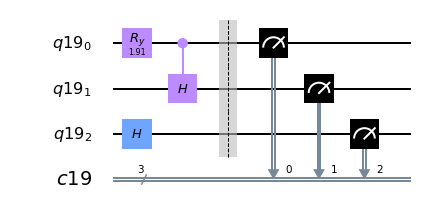

In [75]:
#circuit.ry(math.pi, qreg[0])
circuit.ry(2*acos(1/sqrt(3)), qreg[0])
circuit.ch(qreg[0], qreg[1])
#circuit.cx(qreg[1], qreg[0])
circuit.h(qreg[2])
circuit.barrier()
circuit.measure(qreg[0], creg[0])
circuit.measure(qreg[1], creg[1])
circuit.measure(qreg[2],creg[2])
circuit.draw(output='mpl')

In [78]:
simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)
#result = execute(circuit, backend=simulator).result()
#tai
result = execute(circuit, backend=simulator, memory=True).result().get_memory()
print(result)
#from qiskit.tools.visualization import plot_histogram
#plot_histogram(result.get_counts(circuit))

['000', '001', '100', '100', '011', '111', '011', '001', '100', '000', '000', '100', '111', '011', '001', '101', '101', '101', '111', '011', '011', '101', '111', '011', '100', '101', '101', '011', '101', '101', '011', '100', '101', '100', '000', '111', '011', '100', '001', '011', '011', '001', '001', '011', '101', '011', '011', '111', '101', '011', '101', '011', '101', '111', '000', '011', '000', '101', '111', '011', '101', '011', '011', '111', '011', '101', '001', '100', '000', '100', '011', '011', '000', '101', '100', '000', '101', '000', '011', '101', '000', '100', '001', '001', '111', '111', '011', '111', '011', '001', '111', '100', '111', '011', '100', '100', '000', '101', '111', '011', '100', '000', '111', '001', '111', '111', '000', '101', '101', '000', '000', '100', '011', '111', '011', '101', '101', '101', '001', '100', '001', '100', '000', '011', '101', '000', '000', '101', '111', '111', '000', '100', '001', '001', '011', '000', '011', '101', '100', '100', '001', '000', '111'

In [60]:
#Jos single shot..
#simulator = Aer.get_backend('qasm_simulator')
#result = execute(circuit, backend=simulator, shots =1).result()
#counts = result.get_counts()

In [61]:
#print(counts)

{'011': 1}


Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


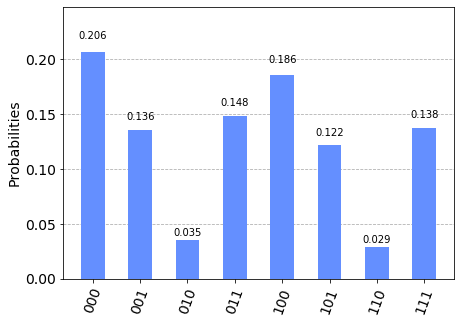

In [79]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_essex')
job = execute(circuit, backend=qcomp)

from qiskit.tools.monitor import job_monitor
job_monitor(job) # Koodi jää odottamaan tähän, kun lähetys on jonossa ja käsiteltävänä

result = job.result()
plot_histogram(result.get_counts(circuit))

In [80]:
print(result.get_counts())

{'001': 139, '011': 152, '000': 211, '100': 190, '111': 141, '110': 30, '101': 125, '010': 36}
